**Content**
This data set consists of the marks secured by the students in various subjects.

**Inspiration**
To understand the influence of the parents background, test preparation etc on students performance

Dataset can be found at https://www.kaggle.com/spscientist/students-performance-in-exams

In [247]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the data and taking a Quick Glance at it**

In [ ]:
pd.set_option("max_columns",None)
df=pd.read_csv("/content/StudentsPerformance.csv")
print(df.tail(5))

#looking the shape of the data
print(f'Dataset has Total Rows= {(df.shape)[0]} and Total Columns= {(df.shape)[1]}')

In [249]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.09,69.17,68.05
std,NaN,NaN,NaN,NaN,NaN,15.16,14.60,15.20
min,NaN,NaN,NaN,NaN,NaN,0.00,17.00,10.00
25%,NaN,NaN,NaN,NaN,NaN,57.00,59.00,57.75
50%,NaN,NaN,NaN,NaN,NaN,66.00,70.00,69.00
75%,NaN,NaN,NaN,NaN,NaN,77.00,79.00,79.00


We notice here that:-

Score obtained in Math range between (0-100) and the average score is 66.09

Score obtained in Reading range between (17-100) and the average score is 69.17	

Score obtained in Writing range between (10-100) and the average score is 68.05

In [250]:
#  Check for number of null values on each columns
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype

In [251]:
# checking for any duplication in the dataset
df.duplicated().sum()

0

There are no duplicates in the dataset

**Column Wrangling**

In [252]:
# To remove white spaces in column names and converting to Title Case
df.columns=df.columns.str.replace(" ","_")
df.columns=df.columns.str.title()
df.rename(columns={"Race/Ethnicity":"Ethnicity","Parental_Level_Of_Education":"Parent_Education"},inplace=True)

df.loc[:,"Ethnicity"]=df.loc[:,"Ethnicity"].str.title()
df.loc[:,"Parent_Education"]=df.loc[:,"Parent_Education"].str.title()
df.loc[:,"Gender"]=df.loc[:,"Gender"].str.title()
df.loc[:,"Lunch"]=df.loc[:,"Lunch"].str.title()
df.loc[:,"Test_Preparation_Course"]=df.loc[:,"Test_Preparation_Course"].str.title()
# check columns names
print(df.columns)

Index(['Gender', 'Ethnicity', 'Parent_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')


**Analysing Data**

In [253]:
# Display gender Value Counts
df["Gender"].value_counts()

Female    518
Male      482
Name: Gender, dtype: int64

In [254]:
# Display Ethnicity Value Counts
df["Ethnicity"].value_counts()

Group C    319
Group D    262
Group B    190
Group E    140
Group A     89
Name: Ethnicity, dtype: int64

In [255]:
# Display Parent Level of Education Value Counts
df["Parent_Education"].value_counts()

Some College          226
Associate'S Degree    222
High School           196
Some High School      179
Bachelor'S Degree     118
Master'S Degree        59
Name: Parent_Education, dtype: int64

In [256]:
# Display lunch Value Counts
df["Lunch"].value_counts()

Standard        645
Free/Reduced    355
Name: Lunch, dtype: int64

In [257]:
# Display test_preparation_course Value Counts/count by size
df["Test_Preparation_Course"].value_counts()
df.groupby("Test_Preparation_Course").size()

Test_Preparation_Course
Completed    358
None         642
dtype: int64

**Exploration**

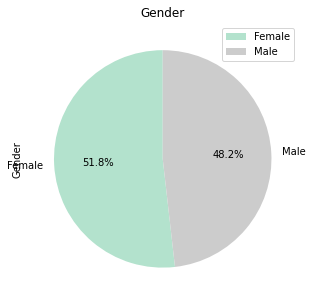

In [258]:
# Ploting the distribution of gender

df["Gender"].value_counts().plot.pie(startangle=90,autopct="%1.1f%%",title="Gender",figsize=(5, 5),legend=True,colormap="Pastel2")

We observere here that, The percentage of female members in our dataet is 51.8% whereas the percentage of Male members is 48.2 %

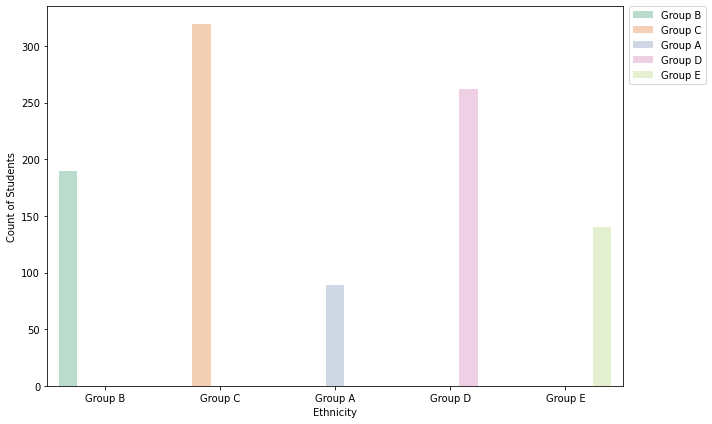

In [260]:
# Ploting the distribution of Ethinicty
plt.figure(figsize=(10,6))
labels=df["Ethnicity"].value_counts().index
values=df["Ethnicity"].value_counts().values
sns.countplot(x="Ethnicity",data=df,palette="Pastel2",hue="Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Count of Students")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

The most common ethnicity is Group C then comes group D, in the third place we have group B followed by group E and group A.

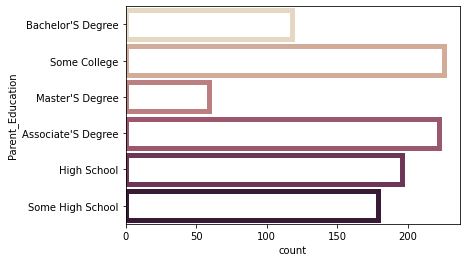

In [261]:
# Ploting the distribution of Parents Education

sns.countplot(y="Parent_Education",data=df,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette("ch:.25", 6))

We observe that the most common education level in Parents is Some-College and Associate;s Degree
Parents with Master's degree are the fewest

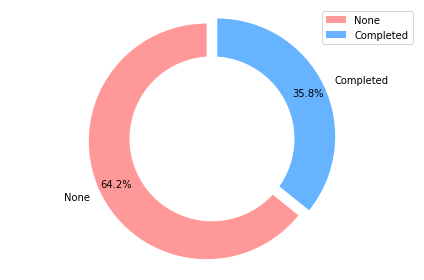

In [262]:
#Ploting the distribution of Test_Preparation_Course

labels = df["Test_Preparation_Course"].value_counts().index
sizes = df["Test_Preparation_Course"].value_counts().values

#colors
colors = ['#ff9999','#66b3ff']

#explsion
explode = (0.05,0.05)

fig, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend(labels, loc="upper right")

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

We observe that most of the Students did not enrolled or completed ther Test Preparation Course

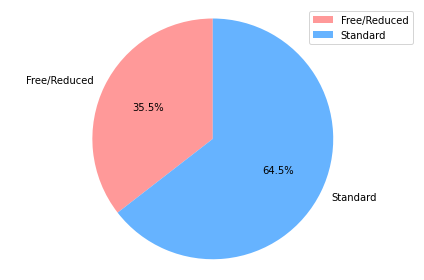

In [263]:
#Ploting the distribution based on Lunch

sizes=df.groupby("Lunch").size().values
labels=df.groupby("Lunch").size().index
fig,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,startangle=90,autopct="%1.1f%%",colors=['#ff9999','#66b3ff'])
ax1.axis('equal')
plt.tight_layout()
plt.legend(labels,loc="upper right")
plt.show()

We observe that Students prefer Standard lunch with 64.5% as compared to free/Reduced lunch which is at 35.5%

0-10      1.00e-03
10-20     2.00e-03
20-30     1.20e-02
30-40     3.40e-02
40-50     1.00e-01
50-60     1.89e-01
60-70     2.70e-01
70-80     2.15e-01
80-90     1.26e-01
90-100    5.01e-02
Name: maths_Score_Bins, dtype: float64


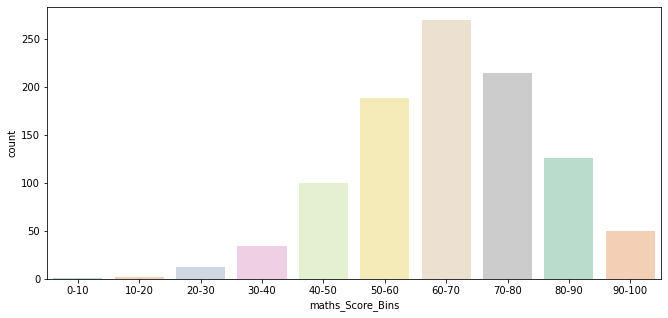

In [296]:
#Ploting the distribution of Maths Score
plt.figure(figsize=(11,5))
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
bins=[0,10,20,30,40,50,60,70,80,90,100]
df["maths_Score_Bins"]=pd.cut(df["Math_Score"],labels=labels,bins=bins)
print(df["maths_Score_Bins"].value_counts(normalize=True,sort=False))
sns.countplot(data=df,x="maths_Score_Bins",palette="Pastel2")

Distribution of Math Score

We observe that 27% (maximum students) are scoring the marks between 60-70 marks range ,21% are scoring between 70-80 range marks.

Only 5% students are scoring in Marks Range (90-100) In Maths

17-25     3.00e-03
25-35     1.10e-02
35-45     4.50e-02
45-55     1.16e-01
55-65     2.16e-01
65-75     2.64e-01
75-85     2.12e-01
85-95     1.03e-01
95-100    2.90e-02
Name: Reading_Score_Bins, dtype: float64


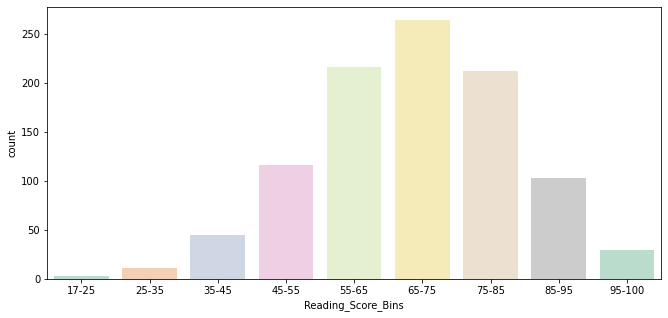

In [273]:
#Ploting the distribution of Reading Score
plt.figure(figsize=(11,5))
labels=['17-25','25-35','35-45','45-55','55-65','65-75','75-85','85-95','95-100']
bins=[17,25,35,45,55,65,75,85,95,100]
df["Reading_Score_Bins"]=pd.cut(df["Reading_Score"],labels=labels,bins=bins)
print(df["Reading_Score_Bins"].value_counts(normalize=True,sort=False))
sns.countplot(data=df,x="Reading_Score_Bins",palette="Pastel2")

Distribution of Reading Score

We observe that 26% (maximum students) are scoring the marks between (65-75 )marks range ,21% are scoring between (55-65) and (75-85) range marks.

Only 2% students are scoring in Marks Range (95-100) In Reading 

10-20     2.00e-03
20-30     7.01e-03
30-40     2.50e-02
40-50     8.91e-02
50-60     1.77e-01
60-70     2.43e-01
70-80     2.48e-01
80-90     1.40e-01
90-100    6.81e-02
Name: Writing_Score_Bins, dtype: float64


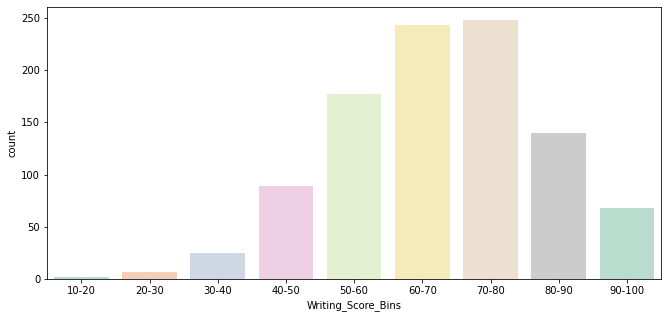

In [274]:
#Ploting the distribution of Writing Score
plt.figure(figsize=(11,5))
labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
bins=[10,20,30,40,50,60,70,80,90,100]
df["Writing_Score_Bins"]=pd.cut(df["Writing_Score"],labels=labels,bins=bins)
print(df["Writing_Score_Bins"].value_counts(normalize=True,sort=False))
sns.countplot(data=df,x="Writing_Score_Bins",palette="Pastel2")

Distribution of Writing Score

We observe that 24% (Maximum Students) are scoring the marks between (60-70) ,(70-80) Marks Range. 

Only 6% students are scoring in Marks Range (90-100) In Writing

**Exploring relationship between columns**

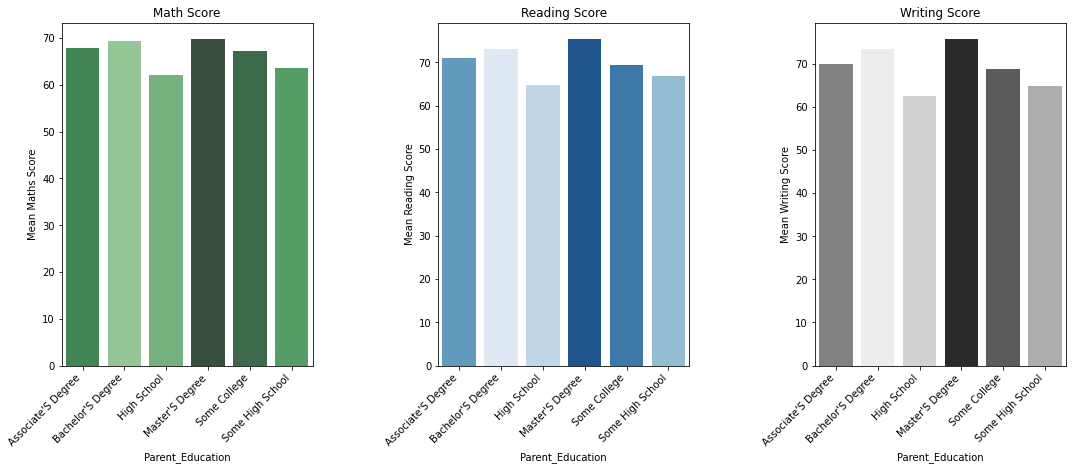

In [294]:
# Analysing the relationship between Parents level of Education and Math Score,Reading score and Writing Score

pd.set_option('precision',2)
fig, ax = plt.subplots(figsize=(18,7), ncols=3)
fig.subplots_adjust(wspace=1/2)

# Maths Score
value=df.groupby("Parent_Education").Math_Score.mean()
pal = sns.color_palette("Greens_d", len(value))
rank=value.argsort()
x=sns.barplot(y=value.values,x=value.index,data=df,palette=np.array(pal[::-1])[rank],ax=ax[0])
x.set_ylabel("Mean Maths Score")
ax[0].set_title('Math Score')
fig.autofmt_xdate(rotation=45)

# Reading_Score
value1=df.groupby("Parent_Education").Reading_Score.mean()
pal = sns.color_palette("Blues", len(value1))
rank1=value1.argsort()
y=sns.barplot(y=value1.values,x=value1.index,data=df,palette=np.array(pal[::-1])[rank1],ax=ax[1])
y.set_ylabel("Mean Reading Score")
ax[1].set_title('Reading Score')
fig.autofmt_xdate(rotation=45)

# Writing_Score
value2=df.groupby("Parent_Education").Writing_Score.mean()
pal = sns.color_palette("Greys", len(value2))
rank2=value2.argsort()
y=sns.barplot(y=value2.values,x=value2.index,data=df,palette=np.array(pal[::-1])[rank2],ax=ax[2])
y.set_ylabel("Mean Writing Score")
ax[2].set_title('Writing Score')
fig.autofmt_xdate(rotation=45)

It is observed that Students whose parents have Masters Degree are scoring the highest in all three Subjects (Maths/Reading and Writing)  subject and least (Maths/Reading and Writing) scores are obtained by students where their parents have High School Degree.






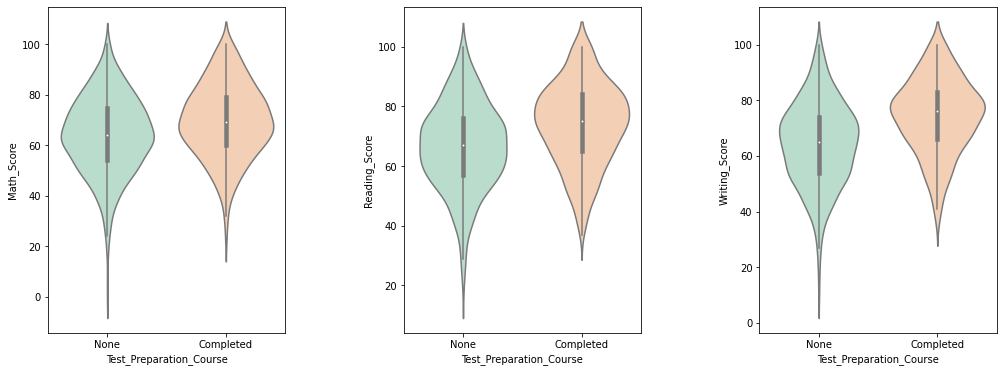

In [309]:
# Analysing the relationship between Test prepartion and Math Score,Reading score and Writing Score

fig,ax=plt.subplots(figsize=(17,6),ncols=3)
fig.subplots_adjust(wspace=1/2)
x = sns.violinplot(x="Test_Preparation_Course", y="Math_Score", data=df,palette="Pastel2",ax=ax[0])
y = sns.violinplot(x="Test_Preparation_Course", y="Reading_Score", data=df,palette="Pastel2",ax=ax[1])
z = sns.violinplot(x="Test_Preparation_Course", y="Writing_Score", data=df,palette="Pastel2",ax=ax[2])
plt.show()

This graph shows us that students who have completed the Test Prepartion score have performed well and scored well in All subject as compared to students who have not taken/enrolled in Test Prepation Course

In [305]:
df.groupby("Test_Preparation_Course").Math_Score.mean()

Test_Preparation_Course
Completed    69.70
None         64.08
Name: Math_Score, dtype: float64

In [306]:
df.groupby("Test_Preparation_Course").Reading_Score.mean()

Test_Preparation_Course
Completed    73.89
None         66.53
Name: Reading_Score, dtype: float64

In [307]:
df.groupby("Test_Preparation_Course").Writing_Score.mean()

Test_Preparation_Course
Completed    74.42
None         64.50
Name: Writing_Score, dtype: float64